<a href="https://colab.research.google.com/github/sudheerkumar4174/kmp/blob/main/Model_with_TFID_AND_COUNT_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter("ignore")

In [ ]:
df = pd.read_csv("amazon1234.csv",encoding="latin1") #due to special charas should be encoded as latin 1


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle
import warnings
warnings.simplefilter("ignore")

In [ ]:
df = df.dropna(how='any',axis=0)

In [ ]:
df.iloc[[191,523,1072,1111,1230,1316]]


,Unnamed: 0,review_text,verified_purchase
192,192,wash cloth nice,True
525,525,realli pleas condition smell love good offer c...,True
1075,1075,can deliv instead,True
1115,1115,even wash deg still get remain capsul washer c...,False
1235,1235,amaz cant rate enough got gift u stop smell sc...,False
1322,1322,last day amaz lynx africa smell time,True


In [ ]:
df["verified_purchase"].value_counts(normalize=True)

verified_purchase
False    0.525701
True     0.474299
Name: proportion, dtype: float64

In [ ]:
#ASSIGN THE VARIABLES
X = df['review_text'] #input var
y = df['verified_purchase'] #target var

In [ ]:
#SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(
    df['review_text'], df['verified_purchase'],test_size=0.4, random_state=42) #40% gives best results, 42 is no of life...

entiredf = format(df.shape[0])
traindf = format(X_train.shape[0])
testdf = format(X_test.shape[0])

print('Number of rows:')
print('Entire dataset:', entiredf)
print('Train dataset:', traindf)
print('Test dataset:',testdf)

Number of rows:
Entire dataset: 1712
Train dataset: 1027
Test dataset: 685


In [ ]:
count_vectorizer  = CountVectorizer(stop_words='english')
count_vectorizer.fit(X_train)
print('\nVocabulary: \n', count_vectorizer
      st)


Vocabulary: 
 {'current': 415, 'sell': 1498, 'price': 1310, 'compar': 343, 'supermarket': 1705, 'good': 761, 'smell': 1563, 'pleasant': 1270, 'need': 1134, 'add': 14, 'small': 1558, 'cloth': 321, 'fresh': 701, 'great': 777, 'moisturis': 1100, 'sensit': 1502, 'love': 1010, 'pour': 1293, 'smaller': 1559, 'bottl': 194, 'make': 1033, 'manag': 1037, 'beat': 137, 'decent': 434, 'fabric': 616, 'soften': 1580, 'nice': 1142, 'fragranc': 696, 'purchas': 1334, 'deliveri': 458, 'cream': 399, 'handwash': 802, 'cheaper': 282, 'hand': 799, 'better': 155, 'liquid': 989, 'oh': 1174, 'wing': 1916, 'dove': 516, 'kitchen': 941, 'bathroom': 131, 'shower': 1527, 'room': 1436, 'recommend': 1378, 'highli': 831, 'star': 1636, 'simpl': 1537, 'gel': 728, 'like': 978, 'glue': 754, 'hard': 806, 'rub': 1444, 'slip': 1555, 'bath': 130, 'goe': 757, 'smoothli': 1569, 'easili': 541, 'wast': 1884, 'leav': 965, 'feel': 645, 'silki': 1535, 'soft': 1579, 'scenti': 1477, 'review': 1419, 'collect': 328, 'promot': 1322, 'exc

In [ ]:
svm1 = SVC(kernel='linear')
svm1.fit(train_c, y_train)
prediction = svm1.predict(test_c)

In [ ]:
#EVALUATION
svm_a1 = accuracy_score(y_test, prediction)*100
svm_p1 = precision_score(y_test, prediction)* 100
svm_r1 = recall_score(y_test, prediction)*100
svm_f11 = f1_score(y_test, prediction)*100


In [ ]:
# prompt: print classification report

print("SVM Classification Report:")
print("Accuracy:", svm_a1)
print("Precision:", svm_p1)
print("Recall:", svm_r1)
print("F1 Score:", svm_f11)


SVM Classification Report:
Accuracy: 84.23357664233576
Precision: 79.35656836461126
Recall: 90.51987767584097
F1 Score: 84.57142857142857


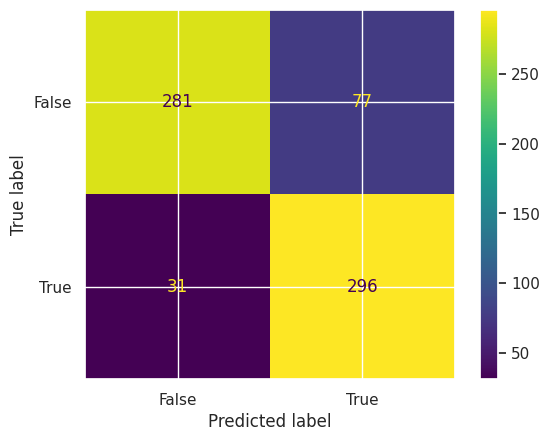

In [ ]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=svm1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm1.classes_)
display.plot()

MULTINOMIAL

In [ ]:
#IMPLEMENTING AND RUNNNING MNB MODEL - COUNT
mnb1 = MultinomialNB()
mnb1.fit(train_c, y_train)
prediction = mnb1.predict(test_c)

80.43795620437956
80.83067092651757
77.37003058103976
79.0625


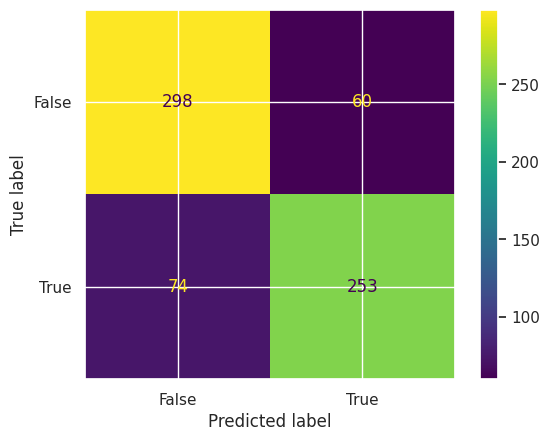

In [ ]:
mnb_a1 = accuracy_score(y_test, prediction)*100
mnb_p1 = precision_score(y_test, prediction)* 100
mnb_r1 = recall_score(y_test, prediction)*100
mnb_f11 = f1_score(y_test, prediction)*100
print(mnb_a1)
print(mnb_p1)
print(mnb_r1)
print(mnb_f11)
cm =  confusion_matrix(y_test, prediction, labels=mnb1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mnb1.classes_)
display.plot()

KNN WITH COUNT


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=100)
rf1.fit(train_c, y_train)
prediction = rf1.predict(test_c)

84.67153284671532
79.83870967741935
90.82568807339449
84.97854077253218


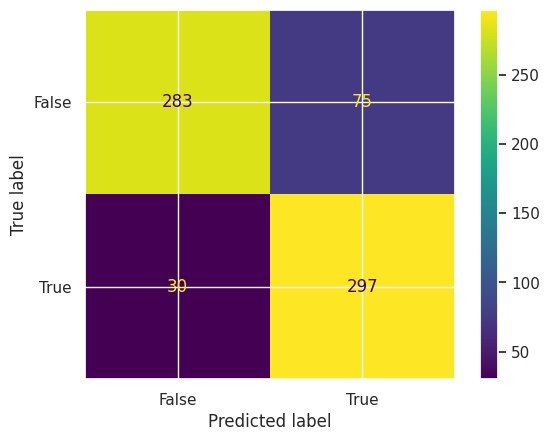

In [ ]:
rf_a1 = accuracy_score(y_test, prediction)*100
rf_p1 = precision_score(y_test, prediction)* 100
rf_r1 = recall_score(y_test, prediction)*100
rf_f11 = f1_score(y_test, prediction)*100
print(rf_a1)
print(rf_p1)
print(rf_r1)
print(rf_f11)
cm =  confusion_matrix(y_test, prediction, labels=rf1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf1.classes_)
display.plot()


USING TFID

In [ ]:
#term frequency and inverse document frequency
TFIDF_vectorizer  = TfidfVectorizer(stop_words='english')

TFIDF_vectorizer.fit(X_train)
print('\nVocabulary: \n', TFIDF_vectorizer.vocabulary_)

train_tf = TFIDF_vectorizer.fit_transform(X_train)
test_tf = TFIDF_vectorizer.transform(X_test)


Vocabulary: 
 {'current': 415, 'sell': 1498, 'price': 1310, 'compar': 343, 'supermarket': 1705, 'good': 761, 'smell': 1563, 'pleasant': 1270, 'need': 1134, 'add': 14, 'small': 1558, 'cloth': 321, 'fresh': 701, 'great': 777, 'moisturis': 1100, 'sensit': 1502, 'love': 1010, 'pour': 1293, 'smaller': 1559, 'bottl': 194, 'make': 1033, 'manag': 1037, 'beat': 137, 'decent': 434, 'fabric': 616, 'soften': 1580, 'nice': 1142, 'fragranc': 696, 'purchas': 1334, 'deliveri': 458, 'cream': 399, 'handwash': 802, 'cheaper': 282, 'hand': 799, 'better': 155, 'liquid': 989, 'oh': 1174, 'wing': 1916, 'dove': 516, 'kitchen': 941, 'bathroom': 131, 'shower': 1527, 'room': 1436, 'recommend': 1378, 'highli': 831, 'star': 1636, 'simpl': 1537, 'gel': 728, 'like': 978, 'glue': 754, 'hard': 806, 'rub': 1444, 'slip': 1555, 'bath': 130, 'goe': 757, 'smoothli': 1569, 'easili': 541, 'wast': 1884, 'leav': 965, 'feel': 645, 'silki': 1535, 'soft': 1579, 'scenti': 1477, 'review': 1419, 'collect': 328, 'promot': 1322, 'exc

In [ ]:
mnb2 = MultinomialNB()
mnb2.fit(train_tf, y_train)
prediction = mnb2.predict(test_tf)

81.31386861313868
85.15901060070671
73.70030581039755
79.01639344262294


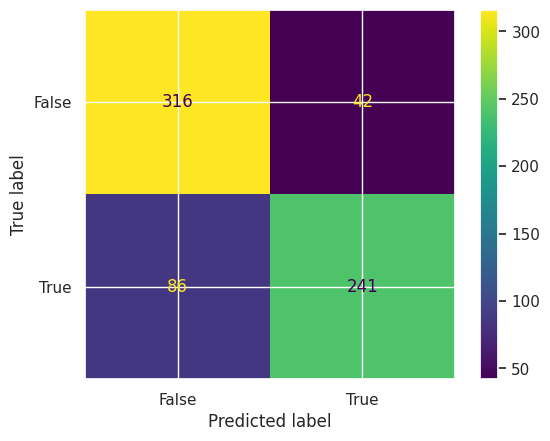

In [ ]:
#EVALUATION
mnb_a2 = accuracy_score(y_test, prediction)*100
mnb_p2 = precision_score(y_test, prediction)* 100
mnb_r2 = recall_score(y_test, prediction)*100
mnb_f12 = f1_score(y_test, prediction)*100
print(mnb_a2)
print(mnb_p2)
print(mnb_r2)
print(mnb_f12)
cm =  confusion_matrix(y_test, prediction, labels=mnb2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mnb2.classes_)
display.plot()

Support Vector Machine model


In [ ]:
svm2 = SVC(kernel='linear')
svm2.fit(train_tf, y_train)
prediction = svm2.predict(test_tf)

83.7956204379562
82.33532934131736
84.09785932721712
83.2072617246596


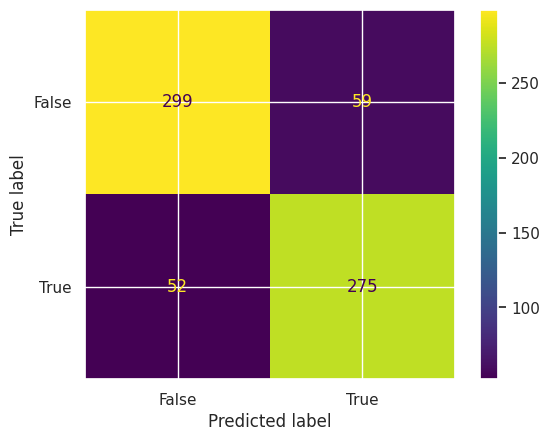

In [ ]:
svm_a2 = accuracy_score(y_test, prediction)*100
svm_p2 = precision_score(y_test, prediction)* 100
svm_r2 = recall_score(y_test, prediction)*100
svm_f12 = f1_score(y_test, prediction)*100
print(svm_a2)
print(svm_p2)
print(svm_r2)
print(svm_f12)
cm =  confusion_matrix(y_test, prediction, labels=svm2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm2.classes_)
display.plot()

RANDOM FOREST

In [ ]:
rf2 = RandomForestClassifier(n_estimators=100)
rf2.fit(train_tf, y_train)
prediction = rf2.predict(test_tf)

84.23357664233576
79.35656836461126
90.51987767584097
84.57142857142857


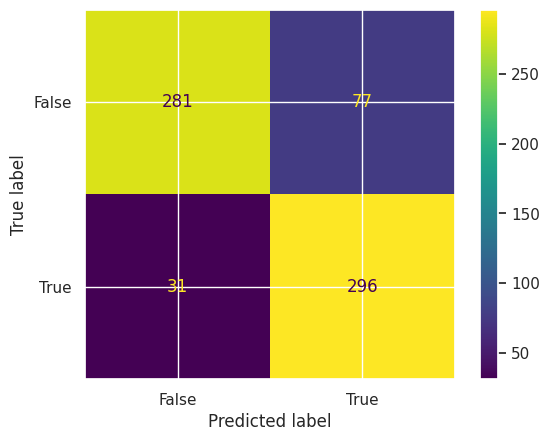

In [ ]:
rf_a2 = accuracy_score(y_test, prediction)*100
rf_p2 = precision_score(y_test, prediction)* 100
rf_r2 = recall_score(y_test, prediction)*100
rf_f12 = f1_score(y_test, prediction)*100
print(rf_a2)
print(rf_p2)
print(rf_r2)
print(rf_f12)
cm =  confusion_matrix(y_test, prediction, labels=rf2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf2.classes_)
display.plot()

In [ ]:
model_accuracy={'MNB': [round(mnb_a1), round(mnb_a2)],
                'SVM': [round(svm_a1), round(svm_a2)],
                'RF':[round(rf_a1),round(rf_a2)]
               }
ma = pd.DataFrame(model_accuracy, columns = ['MNB','SVM','RF'], index=['Count Vectorizer','Tfidf Vectorizer'])
ma

,MNB,SVM,RF
Count Vectorizer,80,84,85
Tfidf Vectorizer,81,84,84


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

# Assuming you already have X_train, X_test, y_train, y_test

# Preprocess text data using TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize individual classifiers
svm_clf = SVC(kernel='linear', probability=True, random_state=42)
nb_clf = MultinomialNB()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create ensemble model using VotingClassifier
ensemble_clf = VotingClassifier(estimators=[
    ('svm', svm_clf),
    ('nb', nb_clf),
    ('rf', rf_clf)
], voting='soft')  # 'soft' voting for probabilities averaging

# Train ensemble model
ensemble_clf.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = ensemble_clf.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Model Accuracy:", accuracy)


Ensemble Model Accuracy: 0.8379562043795621


COMBINATION 1 SVM AND NB USING TFID

In [ ]:

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


svm_clf = SVC(kernel='linear', probability=True, random_state=42)
nb_clf = MultinomialNB()

ensemble_clf = VotingClassifier(estimators=[
    ('svm', svm_clf),
    ('nb', nb_clf)
], voting='soft')

ensemble_clf.fit(X_train_tfidf, y_train)


y_pred = ensemble_clf.predict(X_test_tfidf)

accuracy1= accuracy_score(y_test, y_pred)

print("Ensemble Model Accuracy:", accuracy1)

print(classification_report(y_test, y_pred))


Ensemble Model Accuracy: 0.8394160583941606
              precision    recall  f1-score   support

       False       0.82      0.89      0.85       358
        True       0.86      0.79      0.82       327

    accuracy                           0.84       685
   macro avg       0.84      0.84      0.84       685
weighted avg       0.84      0.84      0.84       685



COMBINATION 2 SVM AND RF

In [ ]:

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

svm_clf = SVC(kernel='linear', probability=True, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

ensemble_clf = VotingClassifier(estimators=[
    ('svm', svm_clf),
    ('rf', rf_clf)
], voting='soft')

ensemble_clf.fit(X_train_tfidf, y_train)

y_pred = ensemble_clf.predict(X_test_tfidf)

accuracy2= accuracy_score(y_test, y_pred)

print("Ensemble Model Accuracy:", accuracy2)

print(classification_report(y_test, y_pred))


Ensemble Model Accuracy: 0.8467153284671532
              precision    recall  f1-score   support

       False       0.88      0.82      0.85       358
        True       0.82      0.87      0.84       327

    accuracy                           0.85       685
   macro avg       0.85      0.85      0.85       685
weighted avg       0.85      0.85      0.85       685



COMBINATION 3 RF AND NB

In [ ]:

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

nb_clf = MultinomialNB()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

ensemble_clf = VotingClassifier(estimators=[
    ('nb', nb_clf),
    ('rf', rf_clf)
], voting='soft')


ensemble_clf.fit(X_train_tfidf, y_train)


y_pred = ensemble_clf.predict(X_test_tfidf)


accuracy3= accuracy_score(y_test, y_pred)

print("Ensemble Model Accuracy:", accuracy3)

print(classification_report(y_test, y_pred))


Ensemble Model Accuracy: 0.8437956204379562
              precision    recall  f1-score   support

       False       0.86      0.84      0.85       358
        True       0.83      0.85      0.84       327

    accuracy                           0.84       685
   macro avg       0.84      0.84      0.84       685
weighted avg       0.84      0.84      0.84       685



In [ ]:
acc1=0.8394160583941606
acc2=0.8467153284671532
acc3=0.8437956204379562
import pandas as pd
ensemble_accuracies = {
    'SVM + NB': acc1,
    'SVM + RF': acc2,
    'RF + NB': acc3
}

ensemble_df = pd.DataFrame.from_dict(ensemble_accuracies, orient='index', columns=['Accuracy'])
print("Ensemble Model Accuracies:")
print(ensemble_df.to_string())


Ensemble Model Accuracies:
          Accuracy
SVM + NB  0.839416
SVM + RF  0.846715
RF + NB   0.843796


ENSEMBLE WITH SVM AND NB USING COUNT VECTORIZER

In [ ]:
count_vectorizer = CountVectorizer(max_features=10000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

svm_clf = SVC(kernel='linear', probability=True, random_state=42)
nb_clf = MultinomialNB()

ensemble_clf = VotingClassifier(estimators=[
    ('svm', svm_clf),
    ('nb', nb_clf)
], voting='soft')

ensemble_clf.fit(X_train_count, y_train)

y_pred = ensemble_clf.predict(X_test_count)

accuracy11= accuracy_score(y_test, y_pred)

print("Ensemble Model Accuracy:", accuracy11)

print(classification_report(y_test, y_pred))


Ensemble Model Accuracy: 0.8350364963503649
              precision    recall  f1-score   support

       False       0.86      0.82      0.84       358
        True       0.81      0.85      0.83       327

    accuracy                           0.84       685
   macro avg       0.84      0.84      0.83       685
weighted avg       0.84      0.84      0.84       685



COMBINATION 2 USING COUNT VECTORIZER

In [ ]:

count_vectorizer = CountVectorizer(max_features=10000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

svm_clf = SVC(kernel='linear', probability=True, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

ensemble_clf = VotingClassifier(estimators=[
    ('svm', svm_clf),
    ('rf', rf_clf)
], voting='soft')

ensemble_clf.fit(X_train_count, y_train)

y_pred = ensemble_clf.predict(X_test_count)

accuracy22= accuracy_score(y_test, y_pred)

print("Ensemble Model Accuracy:", accuracy22)

print(classification_report(y_test, y_pred))


Ensemble Model Accuracy: 0.8496350364963504
              precision    recall  f1-score   support

       False       0.92      0.78      0.84       358
        True       0.79      0.92      0.85       327

    accuracy                           0.85       685
   macro avg       0.86      0.85      0.85       685
weighted avg       0.86      0.85      0.85       685



COMBINATION 3 USING COUNT VECTORIZER

In [ ]:


count_vectorizer = CountVectorizer(max_features=10000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

nb_clf = MultinomialNB()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

ensemble_clf = VotingClassifier(estimators=[
    ('nb', nb_clf),
    ('rf', rf_clf)
], voting='soft')


ensemble_clf.fit(X_train_count, y_train)


y_pred = ensemble_clf.predict(X_test_count)


accuracy33= accuracy_score(y_test, y_pred)

print("Ensemble Model Accuracy:", accuracy33)

print(classification_report(y_test, y_pred))


Ensemble Model Accuracy: 0.8394160583941606
              precision    recall  f1-score   support

       False       0.88      0.80      0.84       358
        True       0.80      0.88      0.84       327

    accuracy                           0.84       685
   macro avg       0.84      0.84      0.84       685
weighted avg       0.84      0.84      0.84       685



In [ ]:
acc11=0.8350364963503649
acc22=0.8496350364963504
acc33=0.8394160583941606
import pandas as pd
ensemble_accuracies = {
    'SVM + NB': acc1,
    'SVM + RF': acc2,
    'RF + NB': acc3
}

ensemble_df = pd.DataFrame.from_dict(ensemble_accuracies, orient='index', columns=['Accuracy'])
print("Ensemble Model Accuracies:")
print(ensemble_df.to_string())


Ensemble Model Accuracies:
          Accuracy
SVM + NB  0.839416
SVM + RF  0.846715
RF + NB   0.843796
